<a href="https://colab.research.google.com/github/Kishankumar1328/tensorflow/blob/main/Standarized_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

In [11]:
iris=load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [12]:
x,y=iris.data[:,:2],(iris.target!=0)*1


In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [15]:
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(units=1,activation='sigmoid')
])

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=["accuracy"])

In [21]:
history=model.fit(x_train,y_train,epochs=42,verbose=1)

Epoch 1/42
4/4 [==============================] - 0s 4ms/step - loss: 0.2821 - accuracy: 0.9667
Epoch 2/42
4/4 [==============================] - 0s 3ms/step - loss: 0.2814 - accuracy: 0.9667
Epoch 3/42
4/4 [==============================] - 0s 6ms/step - loss: 0.2805 - accuracy: 0.9750
Epoch 4/42
4/4 [==============================] - 0s 3ms/step - loss: 0.2798 - accuracy: 0.9750
Epoch 5/42
4/4 [==============================] - 0s 3ms/step - loss: 0.2790 - accuracy: 0.9750
Epoch 6/42
4/4 [==============================] - 0s 3ms/step - loss: 0.2782 - accuracy: 0.9750
Epoch 7/42
4/4 [==============================] - 0s 3ms/step - loss: 0.2775 - accuracy: 0.9750
Epoch 8/42
4/4 [==============================] - 0s 3ms/step - loss: 0.2767 - accuracy: 0.9750
Epoch 9/42
4/4 [==============================] - 0s 5ms/step - loss: 0.2760 - accuracy: 0.9750
Epoch 10/42
4/4 [==============================] - 0s 4ms/step - loss: 0.2752 - accuracy: 0.9750
Epoch 11/42
4/4 [======================

In [23]:
y_pred=(model.predict(x_test)>0.5).astype("int32")


1/1 [==============================] - 0s 29ms/step


In [24]:
accuracy=accuracy_score(y_test,y_pred)

In [25]:
print("Test Accuracy:{:.2f}%".format(accuracy*100))

Test Accuracy:100.00%


Text(0, 0.5, 'Feature 2(standardized)')

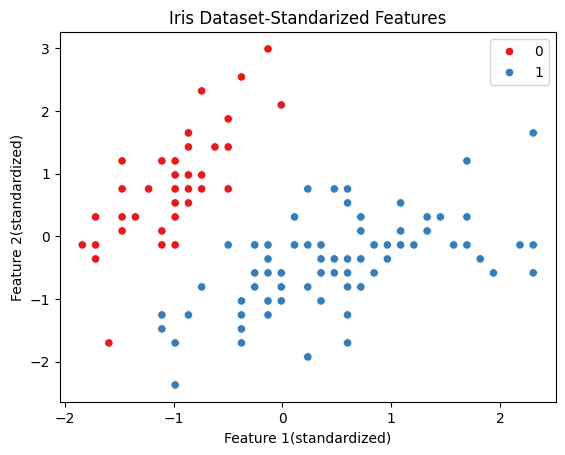

In [33]:
sns.scatterplot(x=x_train[:,0],y=x_train[:,1],hue=y_train,palette='Set1')
plt.title("Iris Dataset-Standarized Features")
plt.xlabel('Feature 1(standardized)')
plt.ylabel('Feature 2(standardized)')

9600/9600 [==============================] - 12s 1ms/step


Text(0, 0.5, 'Feature 2(standardized)')

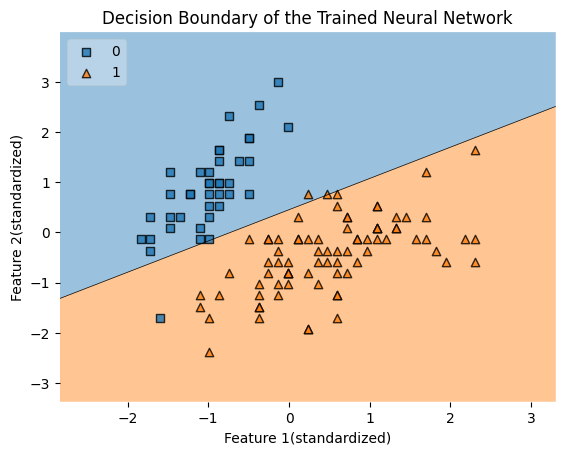

In [37]:
plot_decision_regions(x_train,y_train,clf=model,legend=2)
plt.title("Decision Boundary of the Trained Neural Network")
plt.xlabel('Feature 1(standardized)')
plt.ylabel('Feature 2(standardized)')